## Exercise 3

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [29]:
adult_data = pd.read_csv('adult.csv')
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


we have loaded in the data and look abit on what we are working with. from the info() we can see the differint features and what types they are.

It seems like the dataset contains data on adult with differint variables that could be intresting to look at in relation to income 

it also seems like we have some null values, so lets take a closer look.

In [31]:
adult_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

lets take closer looks at these features containing null values.

In [32]:
print("workclass" + str(adult_data['workclass'].unique()))
print("native" + str(adult_data['native-country'].unique()))
print("occupation" + str(adult_data['occupation'].unique()))


workclass['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
native['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands' nan]
occupation['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]


we can see we also have values="?". lets see how many.

In [33]:
workclass_question_mark_count = (adult_data['workclass'] == '?').sum()
occupation_question_mark_count = (adult_data['occupation'] == '?').sum()
native_country_question_mark_count = (adult_data['native-country'] == '?').sum()

print(f"Number of entries with '?': {workclass_question_mark_count}")
print(f"Number of entries with '?': {occupation_question_mark_count}")
print(f"Number of entries with '?': {native_country_question_mark_count}")

Number of entries with '?': 1836
Number of entries with '?': 1843
Number of entries with '?': 583


for good order lets check if "?" is in other features in the dataset. 

In [34]:
# Check for "?" in all features
for column in adult_data.columns:
    if '?' in adult_data[column].unique():
        print(f'Column "{column}" contains "?"')
    else:
        None

Column "workclass" contains "?"
Column "occupation" contains "?"
Column "native-country" contains "?"


it was only in those 3.

let set all null values to "?" for now.


In [35]:
adult_data.replace(np.nan, '?', inplace=True)


In [36]:
adult_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [37]:
adult_data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


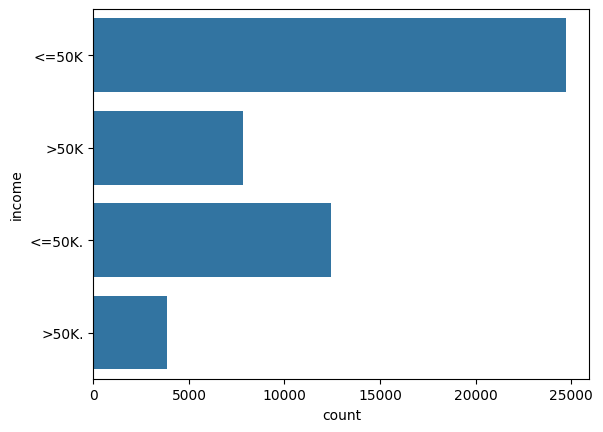

In [38]:
sns.countplot(adult_data['income'], label='Count')
plt.show()


Here we see that we have some more cleaning to do, it seems like that somehow we have gotten a dot at the end on some values so lets clean that up

In [39]:
adult_data['income'] = adult_data['income'].str.replace(r'\.$', '', regex=True)
adult_data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

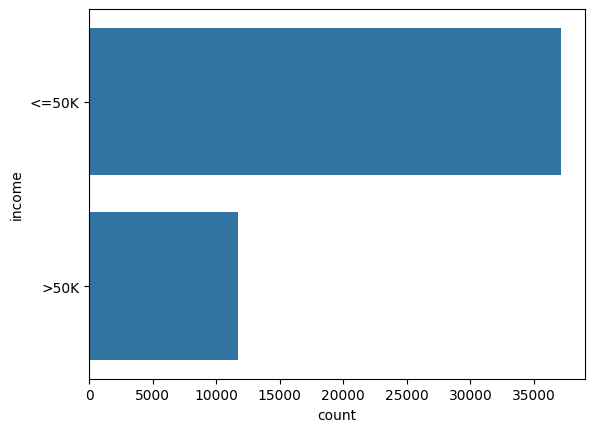

In [40]:
sns.countplot(adult_data['income'], label='Count')
plt.show()


We can see that their is more people to who earn less that 50k than who earn more. around 3 to 1

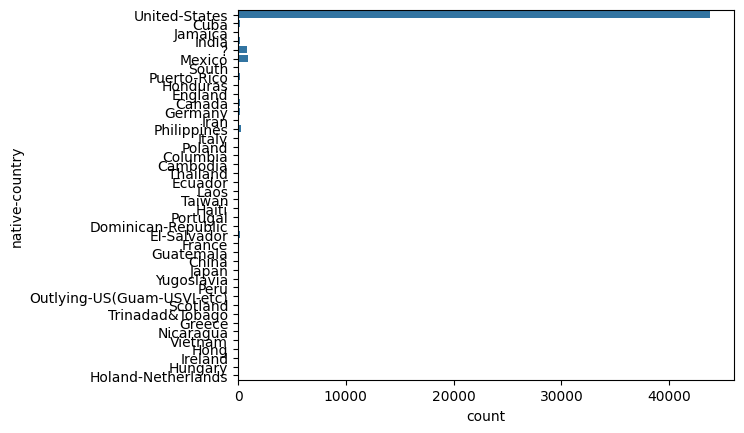

In [41]:
sns.countplot(adult_data['native-country'], label='Count')
plt.show()

Most of the adults are native from USA, let make a count insted 

In [42]:
native_country_counts = adult_data['native-country'].value_counts()
print(native_country_counts)

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

<Axes: xlabel='count', ylabel='sex'>

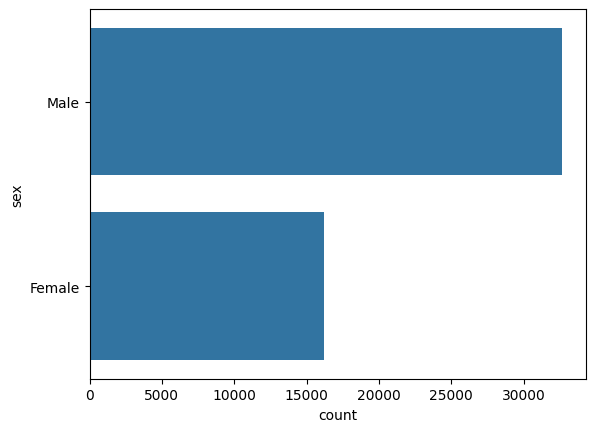

In [43]:
sns.countplot(adult_data['sex'], label='Count')

we have around 2-1 male to female  in the dataset.

<Axes: xlabel='count', ylabel='race'>

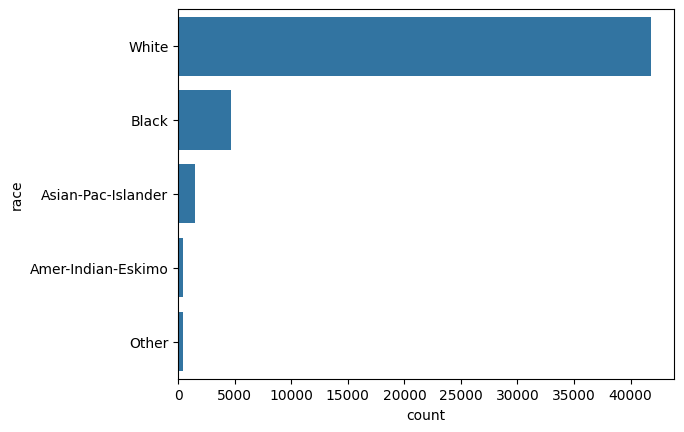

In [44]:
sns.countplot(adult_data['race'], label='Count')

white is the largest group by far

<Axes: xlabel='count', ylabel='relationship'>

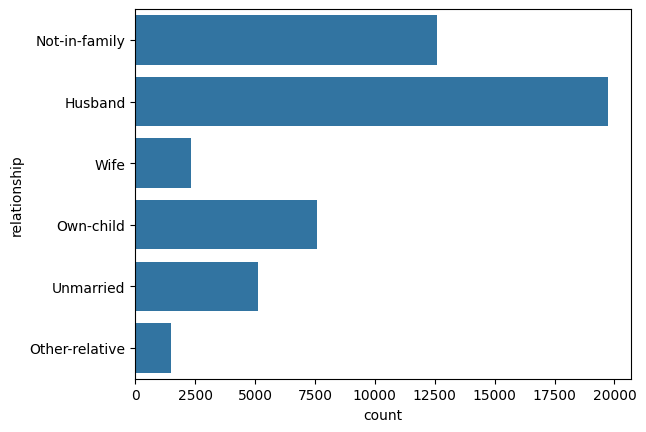

In [45]:
sns.countplot(adult_data['relationship'], label='Count')

<Axes: xlabel='count', ylabel='occupation'>

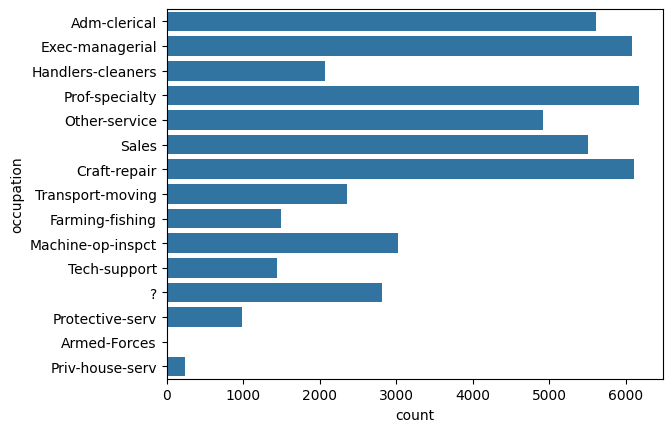

In [46]:
sns.countplot(adult_data['occupation'], label='Count')

here we see the distribution of the occupation

<Axes: xlabel='count', ylabel='marital-status'>

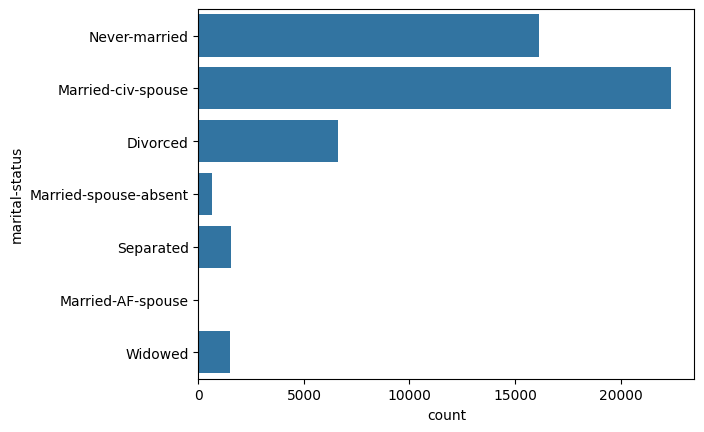

In [47]:
sns.countplot(adult_data['marital-status'], label='Count')

<Axes: xlabel='count', ylabel='education'>

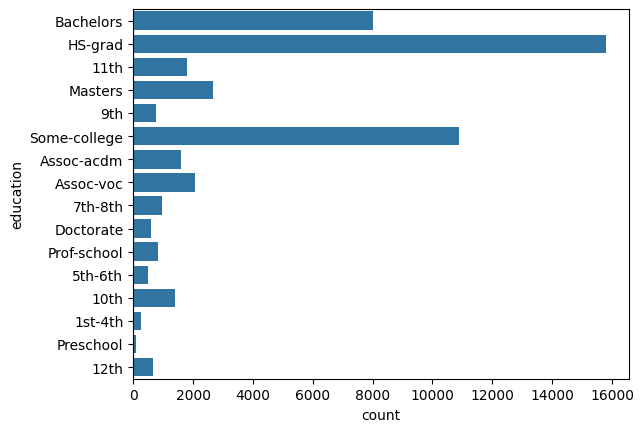

In [48]:
sns.countplot(adult_data['education'], label='Count')

the education level for the adults

<Axes: xlabel='count', ylabel='workclass'>

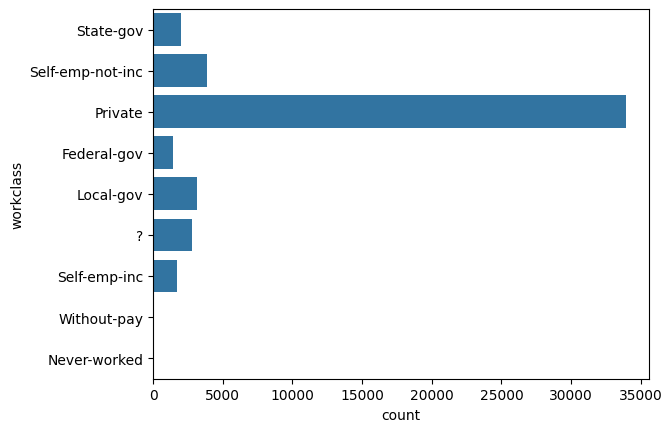

In [49]:
sns.countplot(adult_data['workclass'], label='Count')

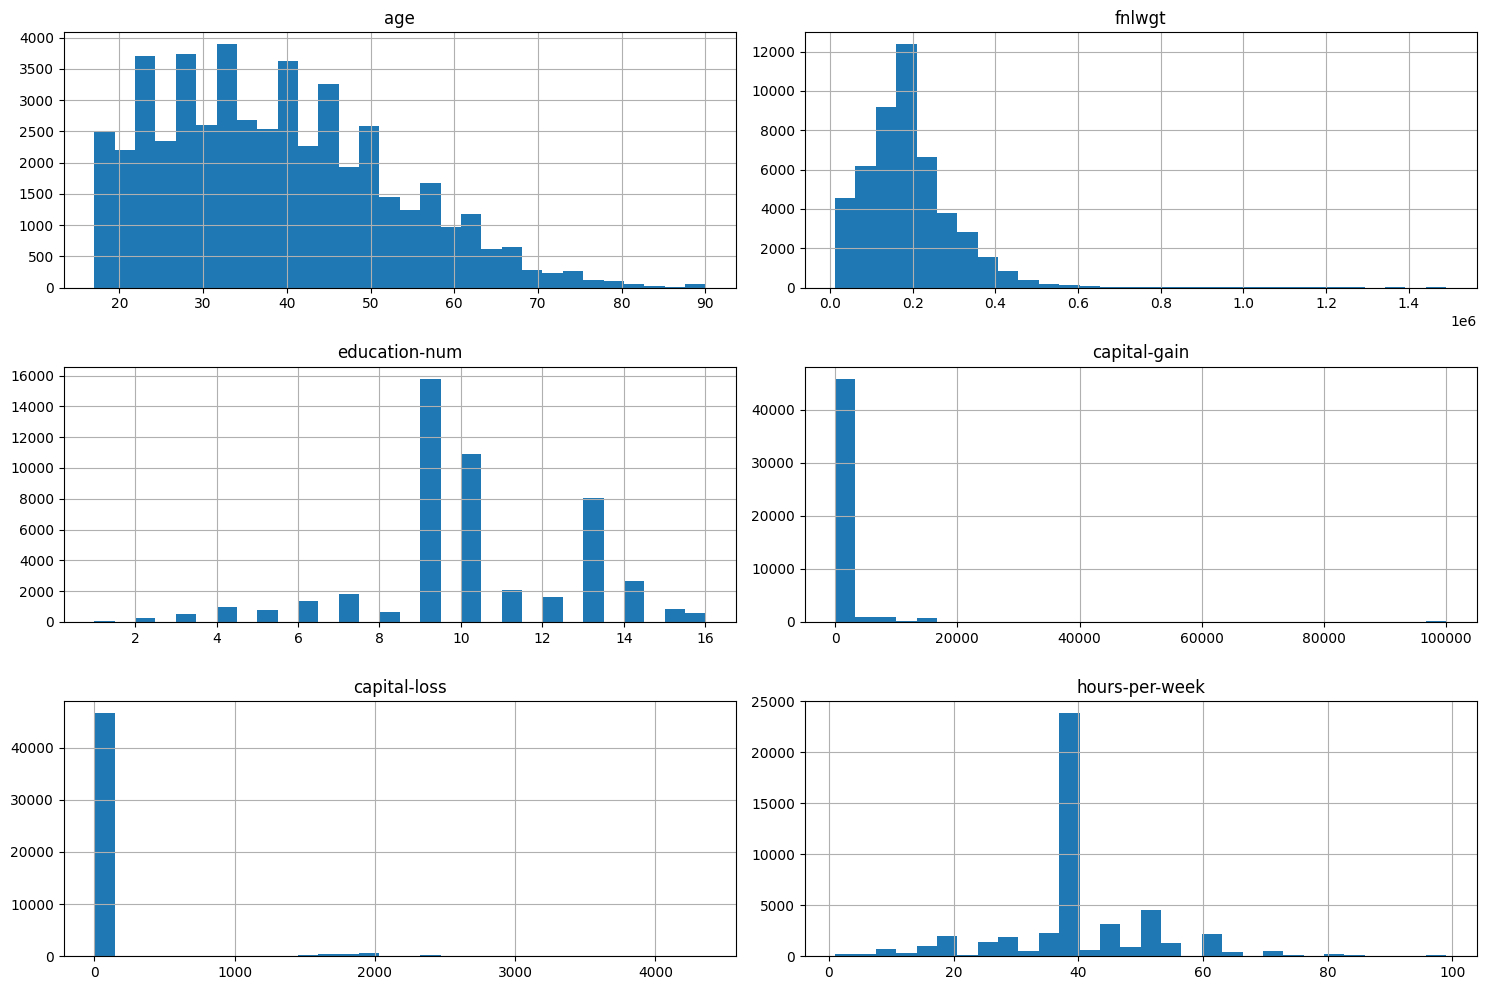

In [50]:
adult_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

<br>Lets do a correlation heatmap</br>

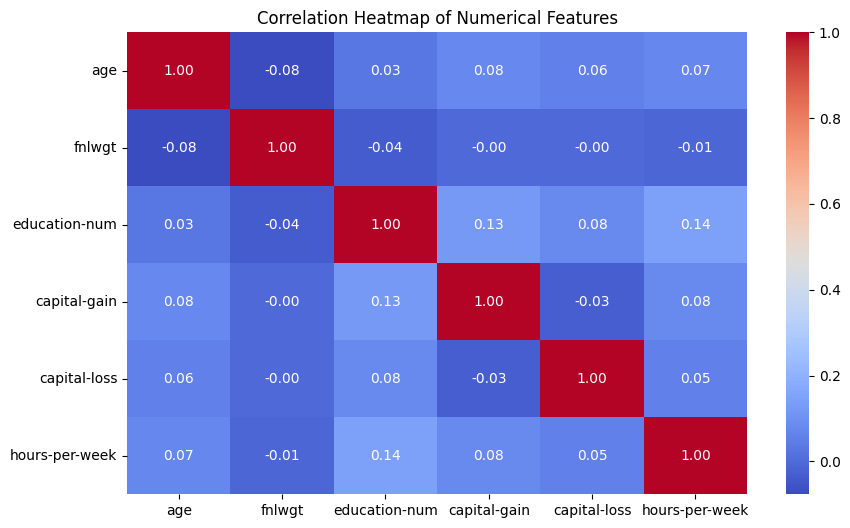

In [52]:
# Select only numeric columns
numeric_data = adult_data.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


we can see that their is non of the numeric values that has a strong correlation with each other.

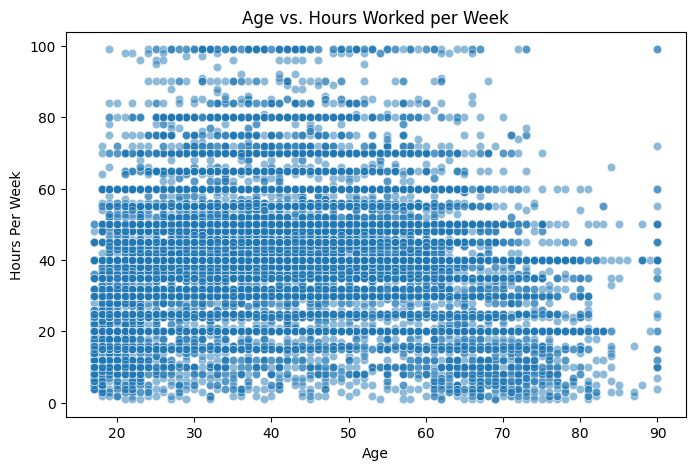

In [56]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='hours-per-week', data=adult_data, alpha=0.5)
plt.title("Age vs. Hours Worked per Week")
plt.xlabel("Age")
plt.ylabel("Hours Per Week")
plt.show()


As said none of the numeric values has a strong correlation.

I think that workclass and age could be interestting to look at, i would guss we would see that more young peole has never worked.

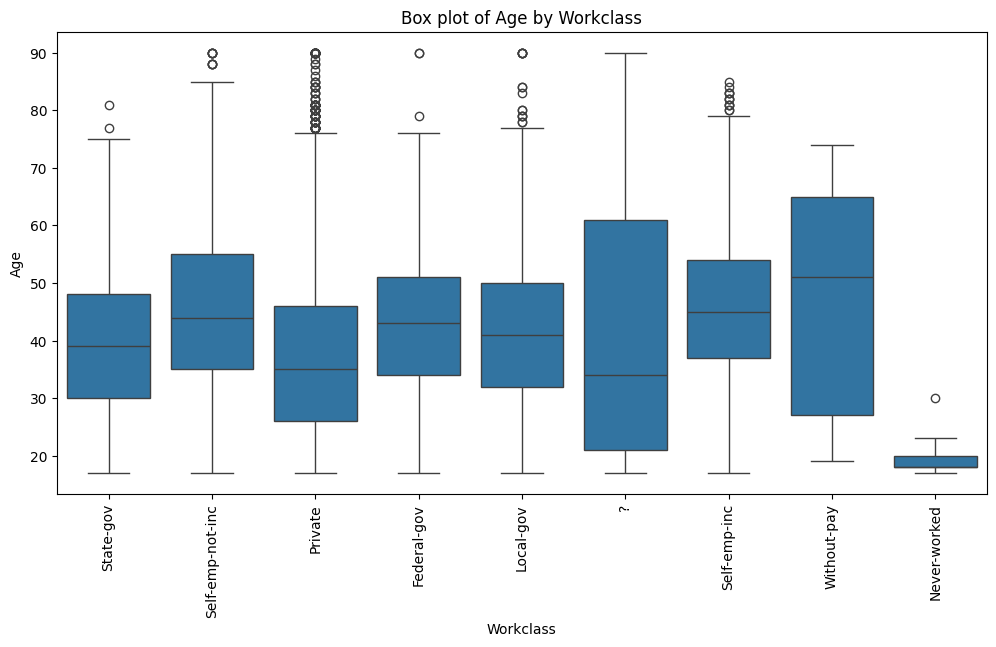

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='workclass', y='age', data=adult_data)
plt.xticks(rotation=90)
plt.title('Box plot of Age by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Age')
plt.show()

In [66]:
# One-hot encode the 'workclass' column
workclass_encoded = pd.get_dummies(adult_data['workclass'], prefix='workclass')

# Create a new dataframe with only the relevant numeric data
relevant_data = pd.concat([adult_data[['age']], workclass_encoded], axis=1)

# Calculate the correlation matrix
correlation_matrix = relevant_data.corr()

# Extract the correlation values between 'age' and the one-hot encoded 'workclass' columns
age_workclass_correlation = correlation_matrix.loc['age', workclass_encoded.columns]
print(age_workclass_correlation)

workclass_?                   0.026931
workclass_Federal-gov         0.049867
workclass_Local-gov           0.057935
workclass_Never-worked       -0.019564
workclass_Private            -0.191263
workclass_Self-emp-inc        0.098962
workclass_Self-emp-not-inc    0.142956
workclass_State-gov           0.013029
workclass_Without-pay         0.013073
Name: age, dtype: float64


In [67]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         48842 non-null  int64
 1   workclass_?                 48842 non-null  bool 
 2   workclass_Federal-gov       48842 non-null  bool 
 3   workclass_Local-gov         48842 non-null  bool 
 4   workclass_Never-worked      48842 non-null  bool 
 5   workclass_Private           48842 non-null  bool 
 6   workclass_Self-emp-inc      48842 non-null  bool 
 7   workclass_Self-emp-not-inc  48842 non-null  bool 
 8   workclass_State-gov         48842 non-null  bool 
 9   workclass_Without-pay       48842 non-null  bool 
dtypes: bool(9), int64(1)
memory usage: 811.0 KB


income  <=50K  >50K
sex                
Female  14423  1769
Male    22732  9918


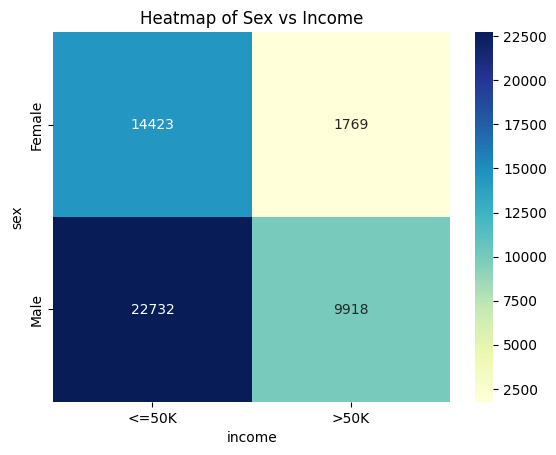

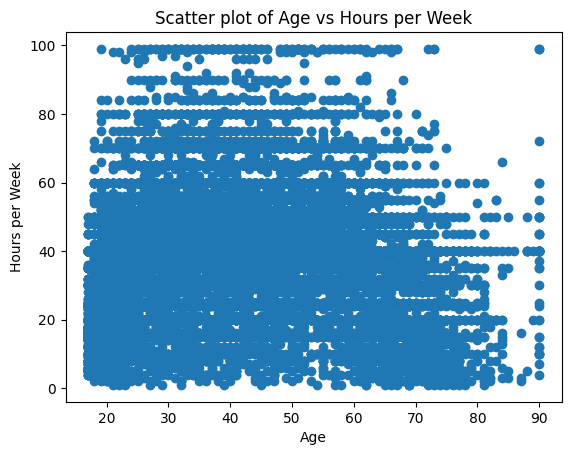

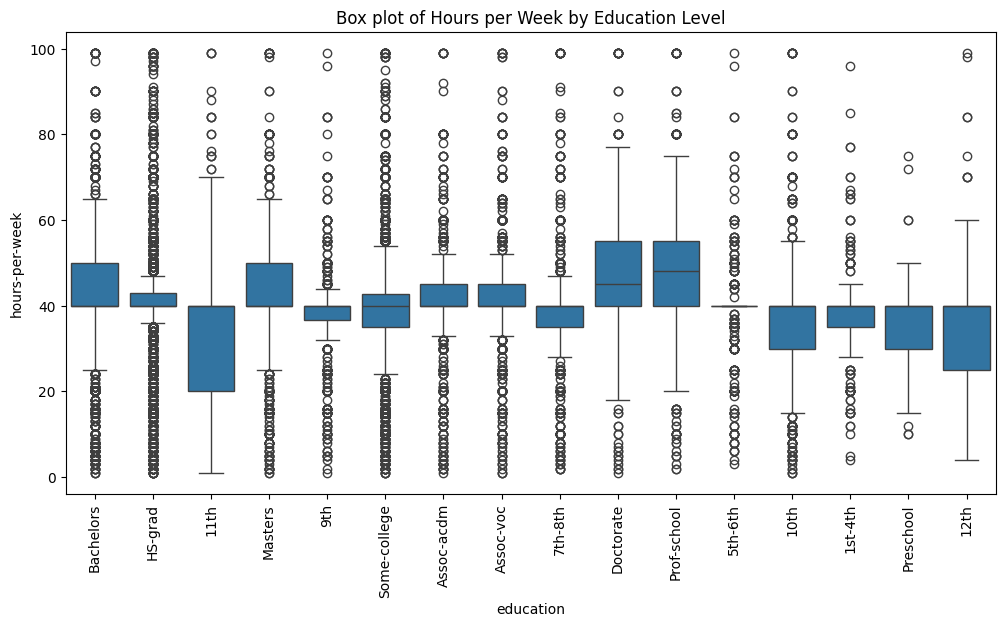

In [51]:
# Both variables are categorical: 'sex' and 'income'
contingency_table = pd.crosstab(adult_data['sex'], adult_data['income'])
print(contingency_table)

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Sex vs Income')
plt.show()

# Both variables are numeric: 'age' and 'hours-per-week'
plt.scatter(adult_data['age'], adult_data['hours-per-week'])
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Scatter plot of Age vs Hours per Week')
plt.show()

# One variable is categorical and the other is numeric: 'education' and 'hours-per-week'
plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='hours-per-week', data=adult_data)
plt.xticks(rotation=90)
plt.title('Box plot of Hours per Week by Education Level')
plt.show()
